# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as stats
from scipy.stats import linregress
from matplotlib.dates import DateFormatter

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

590

## Generate Cities List

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# Initiate Count
record_number = 0

# Set up lists to hold reponse info in dataframe
name_city = []
cloudiness = []
country = []
date = []
humidity = []
latitude = []
longitude = []
max_temp = []
wind_speed = []

# Print Header
print(f"Beginning Data Retrieval")
print(f"-----------------------------------------")

# Loop through the list of cities
for city in cities:    
    
    # Create search query, make request and store in json with a 2 second timer for pausing to avoid temporarily blocking my OpenWeatherMap API key
    weather_response = requests.get(query_url + str(city))
    weather_response_json = weather_response.json()
    time.sleep(2)   
    
    # Try to retrieve and store weather conditions into lists and if a random city is not found in the Open Weathermap then skip 
    try:
        name_city.append(weather_response_json["name"])
        country.append(weather_response_json["sys"]["country"])
        date.append(weather_response_json["dt"])
        latitude.append(weather_response_json["coord"]["lat"])
        longitude.append(weather_response_json["coord"]["lon"])
        cloudiness.append(weather_response_json["clouds"]["all"])
        humidity.append(weather_response_json["main"]["humidity"])
        max_temp.append(weather_response_json["main"]["temp_max"])
        wind_speed.append(weather_response_json["wind"]["speed"])
                   
        print(f"Processing Record {record_number} | {city}")
        record_number += 1
               
    except:
        # Append null values
        print("City not found. Skipping...")

print(f"-----------------------------------------")
print(f"Data Retrieval Complete")

Beginning Data Retrieval
-----------------------------------------
Processing Record 0 | victoria
Processing Record 1 | havoysund
City not found. Skipping...
Processing Record 2 | toul
Processing Record 3 | atuona
Processing Record 4 | chuy
Processing Record 5 | ushuaia
Processing Record 6 | lata
Processing Record 7 | broken hill
Processing Record 8 | kahului
Processing Record 9 | mount gambier
City not found. Skipping...
Processing Record 10 | talaya
Processing Record 11 | sitka
Processing Record 12 | cape town
Processing Record 13 | albany
City not found. Skipping...
Processing Record 14 | grand gaube
Processing Record 15 | eydhafushi
Processing Record 16 | leeton
Processing Record 17 | kapaa
Processing Record 18 | barrow
Processing Record 19 | razole
Processing Record 20 | coquimbo
Processing Record 21 | bredasdorp
Processing Record 22 | axim
Processing Record 23 | arraial do cabo
Processing Record 24 | kruisfontein
Processing Record 25 | vaini
Processing Record 26 | hermanus
Proces

Processing Record 229 | cairns
City not found. Skipping...
Processing Record 230 | tilichiki
Processing Record 231 | micheweni
Processing Record 232 | sabang
Processing Record 233 | dunnville
Processing Record 234 | souillac
Processing Record 235 | luderitz
Processing Record 236 | kavieng
Processing Record 237 | wichian buri
Processing Record 238 | taltal
Processing Record 239 | pingdu
Processing Record 240 | lokosovo
City not found. Skipping...
Processing Record 241 | mopipi
Processing Record 242 | bonthe
Processing Record 243 | beringovskiy
Processing Record 244 | ahuimanu
Processing Record 245 | avera
Processing Record 246 | ocala
Processing Record 247 | leh
Processing Record 248 | itarema
Processing Record 249 | wonthaggi
Processing Record 250 | bubaque
Processing Record 251 | vigrestad
Processing Record 252 | yate
Processing Record 253 | pacific grove
Processing Record 254 | hakkari
City not found. Skipping...
Processing Record 255 | loiza
Processing Record 256 | port hedland
Proc

Processing Record 459 | caribou
Processing Record 460 | tatawin
Processing Record 461 | ostersund
Processing Record 462 | muli
Processing Record 463 | black river
City not found. Skipping...
Processing Record 464 | yamethin
Processing Record 465 | atambua
Processing Record 466 | jacareacanga
Processing Record 467 | coihaique
City not found. Skipping...
Processing Record 468 | lhokseumawe
City not found. Skipping...
Processing Record 469 | ginir
Processing Record 470 | calbuco
Processing Record 471 | istisu
Processing Record 472 | nouadhibou
Processing Record 473 | nedjo
Processing Record 474 | barguzin
Processing Record 475 | emerald
Processing Record 476 | tongliao
Processing Record 477 | zhigansk
Processing Record 478 | hastings
Processing Record 479 | springbok
Processing Record 480 | chermoz
Processing Record 481 | grindavik
Processing Record 482 | rorvik
Processing Record 483 | tessalit
Processing Record 484 | namibe
Processing Record 485 | torbay
Processing Record 486 | lebanon
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
# Create a dictionary and then place into a data frame from lists defined above

weather_dictionary = {"City": name_city,
                      "Country": country,
                      "Date": date,
                      "Latitude": latitude,
                      "Longitude": longitude,
                      "Cloudiness (%)": cloudiness,
                      "Humidity (%)": humidity,
                      "Max Temp (F)": max_temp,
                      "Wind Speed (mph)": wind_speed}

weather_data = pd.DataFrame(weather_dictionary)
weather_data["Date"] = pd.to_datetime(weather_data["Date"],unit='s')
weather_data.to_csv("weather_data_output.csv")
weather_data

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,Hong Kong,HK,2020-03-15 17:06:59,22.29,114.16,20,72,68.00,10.29
1,Havøysund,NO,2020-03-15 17:07:36,71.00,24.66,57,67,21.20,5.82
2,Arrondissement de Toul,FR,2020-03-15 17:07:41,48.67,5.92,97,44,59.00,12.75
3,Atuona,PF,2020-03-15 17:08:04,-9.80,-139.03,17,67,81.84,9.04
4,Chui,UY,2020-03-15 17:08:06,-33.70,-53.46,100,56,73.20,10.65
...,...,...,...,...,...,...,...,...,...
535,Pingliang,CN,2020-03-15 17:28:47,35.54,106.69,100,96,34.86,4.72
536,Kirs,RU,2020-03-15 17:28:49,59.34,52.24,56,94,15.06,5.10
537,Kismayo,SO,2020-03-15 17:28:51,-0.36,42.55,58,80,82.92,13.51
538,Juntas,CR,2020-03-15 17:28:54,10.28,-84.96,80,47,85.98,22.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [3]:
# Build a scatter plot
plt.scatter(weather_data["Latitude"], weather_data["Max Temp (F)"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (03/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("Fig. 01 (Latitude vs. Temperature).png")

# Show plot
plt.show()

NameError: name 'weather_data' is not defined

#### Latitude vs. Humidity Plot

In [4]:
# Build a scatter plot 
plt.scatter(weather_data["Latitude"], weather_data["Humidity (%)"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (03/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humudity (%)")
plt.grid(True)

# Save the figure
plt.savefig("Fig. 02 (Latitude vs. Humidity).png")

# Show plot
plt.show()

NameError: name 'weather_data' is not defined

#### Latitude vs. Cloudiness Plot

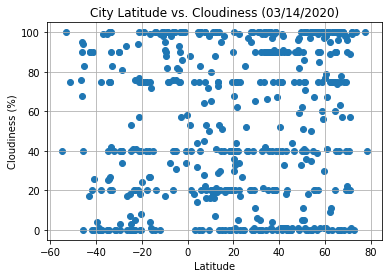

In [40]:
# Build a scatter plot
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness (%)"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (03/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("Fig. 03 (Latitude vs. Cloudiness).png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

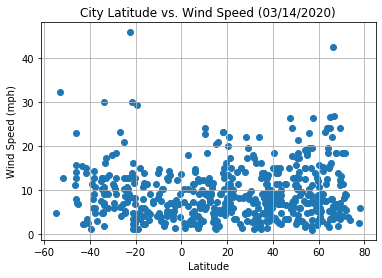

In [41]:
# Build a scatter plot
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed (mph)"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (03/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("Fig. 04 (Latitude vs. Wind Speed).png")

# Show plot
plt.show()

## Linear Regression

In [5]:
# OPTIONAL: Create a function to create Linear Regression plots


In [37]:
# Create Northern and Southern Hemisphere DataFrames

# Define variables to determine cities above and below the equator
northern_cities = weather_data["Latitude"] >= 0
southern_cities = weather_data["Latitude"] < 0

# Place the variables from above into DataFrames 
northern_weather = weather_data[northern_cities]
southern_weather = weather_data[southern_cities]

# Reset the index for each DataFrame
northern_weather = northern_weather.reset_index(drop=True)
southern_weather = southern_weather.reset_index(drop=True)
southern_weather.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,Atuona,PF,2020-03-15 17:08:04,-9.80,-139.03,17,67,81.84,9.04
1,Chui,UY,2020-03-15 17:08:06,-33.70,-53.46,100,56,73.20,10.65
2,Ushuaia,AR,2020-03-15 17:08:08,-54.80,-68.30,40,52,66.20,4.70
3,Broken Hill,AU,2020-03-15 17:08:12,-31.95,141.43,0,41,60.80,5.82
4,Mount Gambier,AU,2020-03-15 17:08:17,-37.83,140.77,0,93,46.40,4.70


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The Correlation (R) between Latitude and Max Temperature (F) is: -0.88


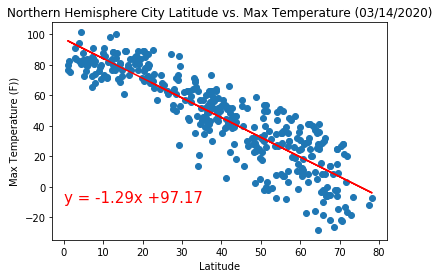

In [86]:
# Calculate the correlation coefficient and linear regression model for latitude and Temperature

# Define x-values by Latitude and y-values by Temperature into lists
x_values = northern_weather["Latitude"]
y_values = northern_weather["Max Temp (F)"]

# Perform a linear regression on latitude vs.Temperature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Hemisphere City Latitude vs. Max Temperature (03/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F))")
plt.annotate(line_eq,(0,-10),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Latitude and Max Temperature (F) is: {round(rvalue,2)}")

# Save the figure
plt.savefig("Fig. 05 (Northern Latitude vs. Temperature).png")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The Correlation (R) between Latitude and Max Temperature (F) is: 0.69


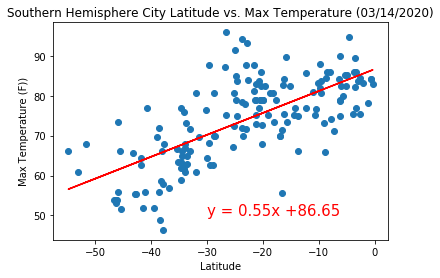

In [87]:
# Calculate the correlation coefficient and linear regression model for latitude and Temperature

# Define x-values by Latitude and y-values by Temperature into lists
x_values = southern_weather["Latitude"]
y_values = southern_weather["Max Temp (F)"]

# Perform a linear regression on latitude vs.Temperature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Hemisphere City Latitude vs. Max Temperature (03/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F))")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Latitude and Max Temperature (F) is: {round(rvalue,2)}")

# Save the figure
plt.savefig("Fig. 06 (Southern Latitude vs. Temperature).png")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The Correlation (R) between Latitude and Humidity is: 0.33


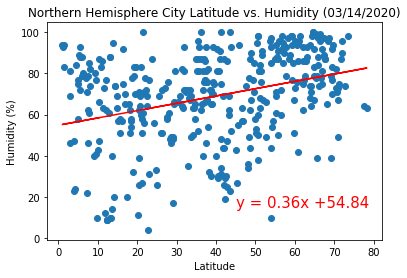

In [94]:
# Calculate the correlation coefficient and linear regression model for latitude and Humidity

# Define x-values by Latitude and y-values by Humidity into lists
x_values = northern_weather["Latitude"]
y_values = northern_weather["Humidity (%)"]

# Perform a linear regression on latitude vs.Humidity
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Hemisphere City Latitude vs. Humidity (03/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(45,15),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Latitude and Humidity is: {round(rvalue,2)}")

# Save the figure
plt.savefig("Fig. 07 (Northern Latitude vs. Humidity).png")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The Correlation (R) between Latitude and Humidity is: 0.16


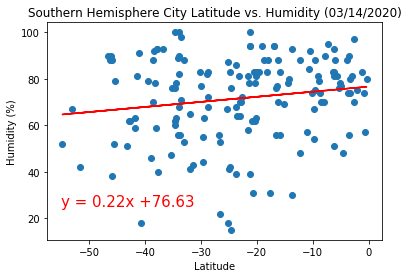

In [89]:
# Calculate the correlation coefficient and linear regression model for latitude and Humidity

# Define x-values by Latitude and y-values by Humidity into lists
x_values = southern_weather["Latitude"]
y_values = southern_weather["Humidity (%)"]

# Perform a linear regression on latitude vs.Humidity
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Hemisphere City Latitude vs. Humidity (03/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Latitude and Humidity is: {round(rvalue,2)}")

# Save the figure
plt.savefig("Fig. 08 (Southern Latitude vs. Humidity).png")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The Correlation (R) between Latitude and Cloudiness is: 0.18


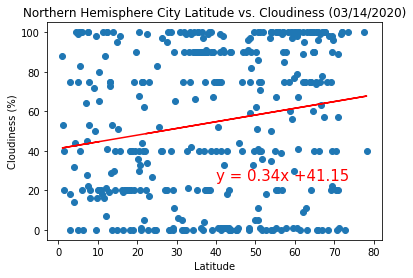

In [100]:
# Calculate the correlation coefficient and linear regression model for latitude and Cloudiness

# Define x-values by Latitude and y-values by Cloudiness into lists
x_values = northern_weather["Latitude"]
y_values = northern_weather["Cloudiness (%)"]

# Perform a linear regression on latitude vs.Cloudiness
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Hemisphere City Latitude vs. Cloudiness (03/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Latitude and Cloudiness is: {round(rvalue,2)}")

# Save the figure
plt.savefig("Fig. 09 (Northern Latitude vs. Cloudiness).png")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The Correlation (R) between Latitude and Cloudiness is: 0.23


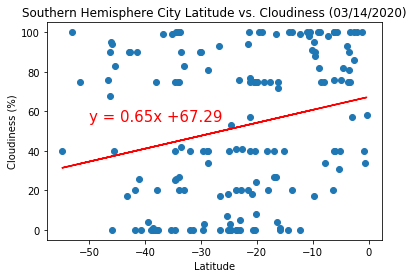

In [101]:
# Calculate the correlation coefficient and linear regression model for latitude and Cloudiness

# Define x-values by Latitude and y-values by Cloudiness into lists
x_values = southern_weather["Latitude"]
y_values = southern_weather["Cloudiness (%)"]

# Perform a linear regression on latitude vs.Cloudiness
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Hemisphere City Latitude vs. Cloudiness (03/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Latitude and Cloudiness is: {round(rvalue,2)}")

# Save the figure
plt.savefig("Fig. 10 (Southern Latitude vs. Cloudiness).png")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The Correlation (R) between Latitude and Wind Speed is: 0.12


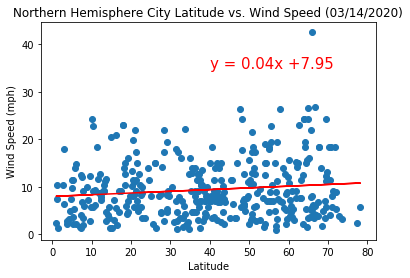

In [103]:
# Calculate the correlation coefficient and linear regression model for latitude and Wind Speed

# Define x-values by Latitude and y-values by Wind Speed into lists
x_values = northern_weather["Latitude"]
y_values = northern_weather["Wind Speed (mph)"]

# Perform a linear regression on latitude vs. Wind Speed
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Hemisphere City Latitude vs. Wind Speed (03/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq,(40,35),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Latitude and Wind Speed is: {round(rvalue,2)}")

# Save the figure
plt.savefig("Fig. 11 (Northern Latitude vs. Wind Speed).png")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The Correlation (R) between Latitude and Wind Speed is: -0.21


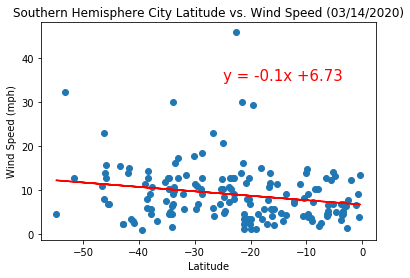

In [105]:
# Calculate the correlation coefficient and linear regression model for latitude and Wind Speed

# Define x-values by Latitude and y-values by Wind Speed into lists
x_values = southern_weather["Latitude"]
y_values = southern_weather["Wind Speed (mph)"]

# Perform a linear regression on latitude vs. Wind Speed
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Hemisphere City Latitude vs. Wind Speed (03/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq,(-25,35),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Latitude and Wind Speed is: {round(rvalue,2)}")

# Save the figure
plt.savefig("Fig. 12 (Southern Latitude vs. Wind Speed).png")

# Show plot
plt.show()